In [3]:
from dotenv import load_dotenv

import os

import pandas as pd
from openai import OpenAI

In [11]:
load_dotenv()

OPENAI_KEY = os.getenv("OPENAI_KEY")
os.environ["OPENAI_API_KEY"] = OPENAI_KEY

In [12]:
client = OpenAI()

In [13]:
model_lst = openai.models
print(model_lst.list())

SyncPage[Model](data=[Model(id='gpt-3.5-turbo-0301', created=1677649963, object='model', owned_by='openai'), Model(id='dall-e-3', created=1698785189, object='model', owned_by='system'), Model(id='dall-e-2', created=1698798177, object='model', owned_by='system'), Model(id='whisper-1', created=1677532384, object='model', owned_by='openai-internal'), Model(id='gpt-3.5-turbo-0125', created=1706048358, object='model', owned_by='system'), Model(id='text-embedding-ada-002', created=1671217299, object='model', owned_by='openai-internal'), Model(id='tts-1-hd-1106', created=1699053533, object='model', owned_by='system'), Model(id='tts-1-hd', created=1699046015, object='model', owned_by='system'), Model(id='davinci-002', created=1692634301, object='model', owned_by='system'), Model(id='babbage-002', created=1692634615, object='model', owned_by='system'), Model(id='text-embedding-3-small', created=1705948997, object='model', owned_by='system'), Model(id='gpt-3.5-turbo-16k-0613', created=1685474247

In [4]:
# dump the list in text file
with open("model_list.txt", "w") as f:
    f.write(str(model_lst.list()))

In [14]:
df = pd.read_csv("/Users/Yasser/Projects/masters_thesis/Master_Thesis/data/argument_relation_class.csv")
df

,text,label
0,"In fact as I said, a lot of the Azure use case...",1
1,"So we continue to build for high AFN, or Amazo...",1
2,"On tech and content, that's going to be a comb...",0
3,And what you'll see is that basically people u...,0
4,Our goal really is to kick-start an ecosystem ...,0
...,...,...
9793,I actually think over the next couple of years...,0
9794,"That said, I don't think it’s growing as fast ...",1
9795,So I think you do see some interplay there on ...,1
9796,"There they're really two key dynamics, the fir...",1


In [15]:
# map labels 1 to Related and 0 to Unrelated
df["label"] = df["label"].map({1: "Related", 0: "Unrelated"})
df

,text,label
0,"In fact as I said, a lot of the Azure use case...",Related
1,"So we continue to build for high AFN, or Amazo...",Related
2,"On tech and content, that's going to be a comb...",Unrelated
3,And what you'll see is that basically people u...,Unrelated
4,Our goal really is to kick-start an ecosystem ...,Unrelated
...,...,...
9793,I actually think over the next couple of years...,Unrelated
9794,"That said, I don't think it’s growing as fast ...",Related
9795,So I think you do see some interplay there on ...,Related
9796,"There they're really two key dynamics, the fir...",Related


In [16]:
# Generate 2 cols by split text column into claim and permise, please note separator is [SEP] then remove [SEP] from premise
df[["claim", "premise"]] = df["text"].str.split("\[SEP\]", n=1, expand=True)
df

,text,label,claim,premise
0,"In fact as I said, a lot of the Azure use case...",Related,"In fact as I said, a lot of the Azure use case...",I even look at the growth of virtual machine ...
1,"So we continue to build for high AFN, or Amazo...",Related,"So we continue to build for high AFN, or Amazo...",Because paid unit growth continues to be stro...
2,"On tech and content, that's going to be a comb...",Unrelated,"On tech and content, that's going to be a comb...",We're continuing to build the products that a...
3,And what you'll see is that basically people u...,Unrelated,And what you'll see is that basically people u...,because the best of the people creating those...
4,Our goal really is to kick-start an ecosystem ...,Unrelated,Our goal really is to kick-start an ecosystem ...,"And then rest of world, we saw some countries..."
...,...,...,...,...
9793,I actually think over the next couple of years...,Unrelated,I actually think over the next couple of years...,We certainly have additional delivery capabil...
9794,"That said, I don't think it’s growing as fast ...",Related,"That said, I don't think it’s growing as fast ...","I mean, you really can't tell the difference,..."
9795,So I think you do see some interplay there on ...,Related,So I think you do see some interplay there on ...,"That means more time in video, and that does ..."
9796,"There they're really two key dynamics, the fir...",Related,"There they're really two key dynamics, the fir...",The component that actually has impacted -- t...


In [17]:
sample = df.sample(3)
sample

,text,label,claim,premise
9302,"From a mix of services, it starts always with,...",Related,"From a mix of services, it starts always with,...","In fact, you could say the measure of a compa..."
7500,"So on the OpEx guide, clearly the biggest driv...",Related,"So on the OpEx guide, clearly the biggest driv...","R&D head count grew 48% year over year in Q2,..."
309,And obviously the kind of numbers that we have...,Related,And obviously the kind of numbers that we have...,The loyalty rate that we have versus competit...


## Modelling

In [31]:
#TODO: Create a function to generate the messages for argument clause relation classification by explaining the task and providing the claim and premise as this:
def generate_messages(claim, premise):
    messages = [
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "Given the following claim and premise."},
        {"role": "user", "content": f"Claim: {claim}"},
        {"role": "user", "content": f"Premise: {premise}"},
        {"role": "assistant", "content": "Please classify the relation between the claim and the premise as either Related or Unrelated. Please only generate one of the two labels."},
    ]
    return messages
    

In [32]:
#TODO: Use the generated prompt to generate the completion using openai's GPT-4 model, please use chat completions
def generate_completions(messages, model="gpt-4"):
    completion = client.chat.completions.create(
        model=model,
        messages=messages
    )
    return completion


In [51]:
#TODO: Use the generated completion to predict the relation between the claim and the premise
def predict_relation(claim, premise, model="gpt-4"):
    try:
        prompt = generate_messages(claim, premise)
        completion = generate_completions(prompt, model)
        return completion.choices[0].message.content
    except Exception as e:
        print(e)
        return "Unrelated"
    

### Dangerous Don't Run!!!

In [67]:
#TODO: Use the predict_relation function to predict the relation between the claim and the premise for the sample then generate a column in df called predicted_relation
df["predicted_relation"] = df.apply(lambda x: predict_relation(x["claim"], x["premise"]), axis=1)
df.head()

KeyboardInterrupt: 

In [ ]:
# save the sample to a csv file
df.to_csv("classification_by_gpt_4.csv", index=False)

In [ ]:
#TODO: report Marco F1 score, precision, recall, and accuracy and the confusion matrix then save them in a text file
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


def report_metrics(y_true, y_pred):
    report = classification_report(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred, labels=["Related", "Unrelated"])
    return report, confusion


              precision    recall  f1-score   support

     Related       1.00      0.67      0.80         3
   Unrelated       0.00      0.00      0.00         0

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3





/Users/Yasser/Projects/masters_thesis/Master_Thesis/.conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Yasser/Projects/masters_thesis/Master_Thesis/.conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Yasser/Projects/masters_thesis/Master_Thesis/.conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

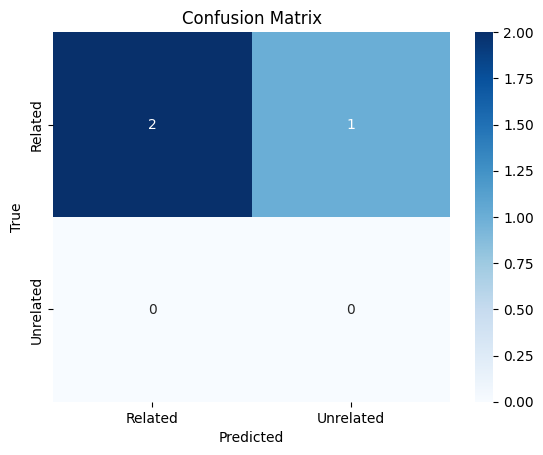

<Figure size 640x480 with 0 Axes>

In [ ]:
#TODO: Save the classification report and the confusion matrix in a text file

y_true = df["label"]
y_pred = df["predicted_relation"]

report, confusion = report_metrics(y_true, y_pred)
print(report)
print("\n")

# heatmap for confusion matrix and show classes and save it
sns.heatmap(confusion, annot=True, cmap="Blues", xticklabels=["Related", "Unrelated"], yticklabels=["Related", "Unrelated"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
plt.savefig("confusion_matrix_gpt_4.png")


In [ ]:
with open("classification_report.txt", "w") as f:
    f.write(report)